=== Data summary ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
=== First samples ===
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free su

/tmp/ipykernel_316/1608786862.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


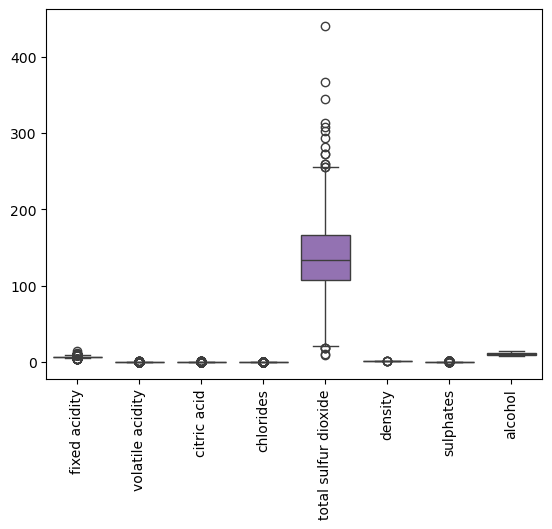

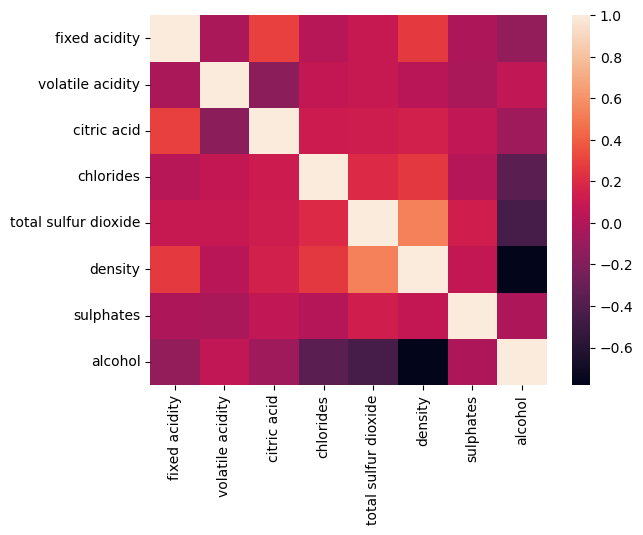

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# download the csv file first!
csv_file = 'winequality-white.csv'
df = pd.read_csv(csv_file, header='infer', delimiter=';')
print('=== Data summary ===')
df.info()
print('=== First samples ===')
print(df.head().to_string())
X = df.drop('quality', axis=1) # we drop the column "quality"
y = df['quality']
print('=== Wine Qualities ===')
print(y.value_counts())
X = X.drop(['residual sugar', 'free sulfur dioxide', 'pH'], axis=1)
bins = [0, 5, 10] # 0->5 'bad' ; '6->10' good
labels = ['bad', 'good']
y = pd.cut(y, bins=bins, labels=labels)
print(y.value_counts())
# create a figure
fig1, ax1 = plt.subplots(1)

# draw the box plots
sns.boxplot(data=X, orient="v")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

# create a new figure
fig2, ax2 = plt.subplots(1)

# compute the matrix correlation
corr = X.corr()

# draw the correlation matrix
sns.heatmap(corr)

 # show the figures
fig1.show()
fig2.show()
# split the dataset into train and test
shuffle = True

np.random.seed(42) # for reproducibility

Xa, Xt, ya, yt = train_test_split(X, y, test_size=0.3, stratify=y, shuffle=shuffle)

# split the trainset into train and validation
Xa, Xv, ya, yv = train_test_split(Xa, ya, test_size=0.5, stratify=ya, shuffle=shuffle)
# Fit the model on (Xa, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(Xa, ya)

# Predict the labels of samples in Xv
yv_ = clf.predict(Xv)

# evaluate classification error rate
valid_error = 1 - accuracy_score(yv, yv_)
print('k={:2} Predict error on validation set: {:.1%}'.format(k, valid_error))
k_max = 60
step = 2
k_ = np.arange(1, k_max, step) #
valid_error_ = np.ndarray(len(k_))
train_error_ = np.ndarray(len(k_))

for i, k in enumerate(k_):

clf = KNeighborsClassifier(n_neighbors=k)
# fit the model
# Predict the labels of samples in Xv, Xa
ya_ = ...
yv_ = ...

# evaluate classification error rate
valid_error = 1 - accuracy_score(yv, yv_)
train_error = 1 - accuracy_score(ya, ya_)

res_str = 'k={:2} Predict error on validation set: {:.1%} ({:.1%} on train)'
print(res_str.format(k, valid_error, train_error))
valid_error_[i] = ...
train_error_[i] = ...

fig3, ax3 = plt.subplots(1)

ax3.plot(k_, valid_error_, label='valid')
ax3.plot(k_, train_error_, label='train')

ax3.set_xlabel('k')
ax3.set_ylabel('Error')
ax3.legend()

fig3.show()
i_star = valid_error_.argmin()
k_star = k_[i_star]
print('k*={}'.format(k_star))

clf = KNeighborsClassifier(n_neighbors=k_star) # selected k on the validation set is k_star

clf.fit(Xa, ya)

yt_ = clf.predict(Xt)

test_error = 1 - accuracy_score(yt, yt_) # performance evaluation on the *test* set

print('Test error: {:.1%}'.format(test_error))